# Linear Regression

TODOS:


*   Implement Linear Regression WITHOUT sklearn
*   Implement Linear Regression with sklearn



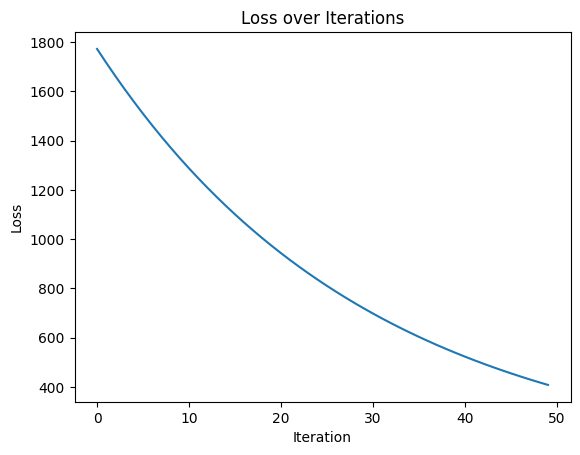

Manual Weights: [24.35452072], Bias: [-3.24147357]
Sklearn Weights: [44.24418216], Bias: 0.09922221422587718


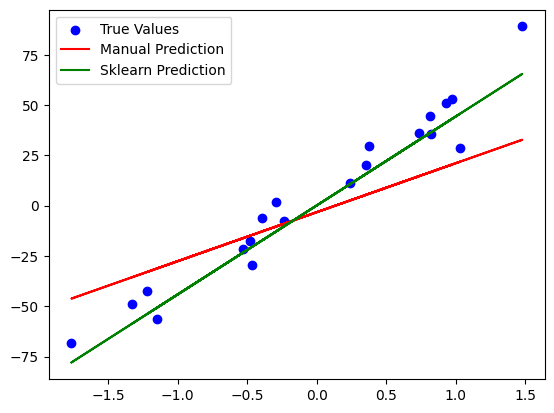

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate a small dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
W = np.random.randn(1)
b = np.random.randn(1)
learning_rate = 0.01
iterations = 50

# Define the linear model
def predict(X, W, b):
    return X.dot(W) + b

# Define Mean Squared Error (MSE) Loss
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient Descent Optimization
losses = []
for i in range(iterations):
    y_pred = predict(X_train, W, b)
    loss = mse_loss(y_train, y_pred)
    losses.append(loss)

    # Calculate gradients
    dW = -(2/len(X_train)) * np.dot(X_train.T, (y_train - y_pred))
    db = -(2/len(X_train)) * np.sum(y_train - y_pred)

    # Update weights and bias
    W -= learning_rate * dW
    b -= learning_rate * db

# Plot the loss curve
plt.plot(range(iterations), losses)
plt.title('Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Compare with Scikit-learn's Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Manual Weights: {W}, Bias: {b}")
print(f"Sklearn Weights: {model.coef_}, Bias: {model.intercept_}")

# Plot predictions
plt.scatter(X_test, y_test, color='blue', label='True Values')
plt.plot(X_test, predict(X_test, W, b), color='red', label='Manual Prediction')
plt.plot(X_test, model.predict(X_test), color='green', label='Sklearn Prediction')
plt.legend()
plt.show()


# K Nearest Neighbor

In [ ]:
# Import necessary libraries
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Only take the first two features (sepal length and width) for visualization
y = iris.target

# Create a pair plot to visualize all features
iris_df = sns.load_dataset("iris")
sns.pairplot(iris_df, hue="species", height=2.5)
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy of k-NN from scratch with k=5: 80.00%


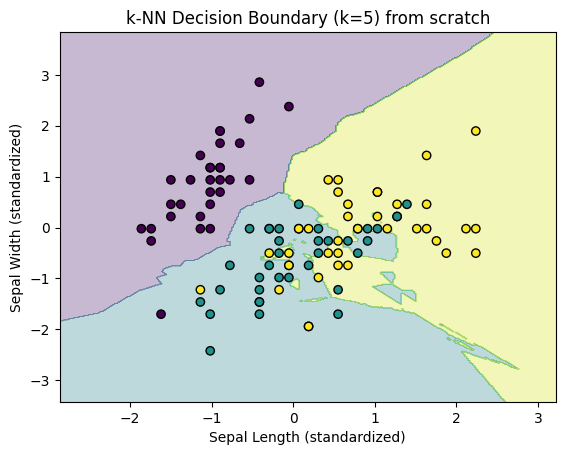

In [ ]:
# Manual Implementation

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# k-NN algorithm from scratch
class KNN:
    # Instantiate and set a value for k
    def __init__(self, k=3):
        self.k = k

    # Memorize training data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):

        # Compute the distance between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k nearest samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize our custom k-NN model
k = 5
knn = KNN(k=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy of k-NN from scratch with k={k}: {accuracy * 100:.2f}%")

# Visualization: decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict for the entire grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(f"k-NN Decision Boundary (k={k}) from scratch")
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.show()

# Plot decision boundary for the custom k-NN classifier
plot_decision_boundary(X_train, y_train, knn)


Accuracy of k-NN with k=5: 80.00%


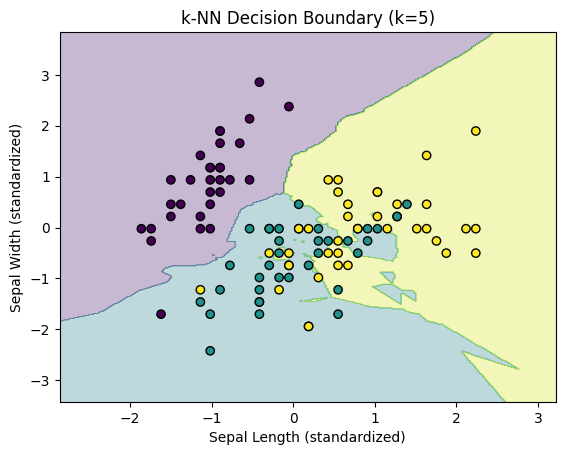

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (k-NN is sensitive to feature scales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize k-NN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train, y_train)

# Test the classifier
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of k-NN with k={k}: {accuracy * 100:.2f}%")

# Visualization: decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid using minimum and max values of data
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Create a grid of equidistant points inside this grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict for the entire grid and shape to be the same size as grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(f"k-NN Decision Boundary (k={k})")
    plt.xlabel('Sepal Length (standardized)')
    plt.ylabel('Sepal Width (standardized)')
    plt.show()

# Plot decision boundary for the k-NN classifier
plot_decision_boundary(X_train, y_train, knn)


# Linear Regression in Practice

See how results change as you use different features

Try to make a multilinear regression model (aka more than one input feature)

Look for outliers and see how after removing outliers affects performance

Look up Ridge and Lasso techniques for regularization

In [ ]:
import pandas as pd

# Advertising Data

# Collect and prepare data
df = pd.read_csv('https://raw.githubusercontent.com/aziac/workshop2data/refs/heads/main/advertising.csv')

# Check for null values

# Plot scatter plot to check for linearity

# Define Model

# Train the Model

# Evaluate Model

# Plot the Results

In [ ]:

# Rent Data

# Collect and prepare data
df_temp = pd.read_csv('https://raw.githubusercontent.com/aziac/workshop2data/refs/heads/main/rent18.csv')

# Process null values
df = df_temp[['price', 'beds', 'baths', 'sqft','room_in_apt']].dropna()

# Plot scatter plot to check for linearity

# Check relationships between variables

# Define Model

# Train the Model

# Evaluate Model

# Plot the Results


# KNN in practice

See how results change as you use different features

See how changing k affects your final decision plot

See how standardizing your data affects things

Look for outliers and see how standardizing data after removing outliers affects performance

Experiment with more than 2 input features

In [ ]:
# Collect and Prep Data
df= pd.read_csv('https://raw.githubusercontent.com/aziac/workshop2data/refs/heads/main/penguins.csv')

# Create a pair plot to visualize all features

# Determine k value

# Init classifier

# Train classifier

# Test classifier

# Plot decision boundaries


